In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


In [1]:
# Importar Librerías
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import Counter, OrderedDict, defaultdict
import operator


In [2]:
# Directorio de Trabajo
os.chdir(os.getcwd() + '/Analisis/data')


In [3]:
# Estilo de las visualizaciones
plt.style.use('seaborn')


In [4]:
# Importar datos para ser analizados
resistencia = pd.read_csv('sensibilidad.csv')


In [5]:
resistencia.head()


,ID,Bacteria,Fenotipo,Genotipo
0,AI6,A.baumannii,IMP;MER,CTX-M
1,AI10,A.baumannii,IMP;MER,CTX-M
2,AI11,A.baumannii,PIME;CAZ;CP;GM;IMP;LEVO;MER;PTZ;TS,CTX-M
3,AI12,A.baumannii,IMP;MER,CTX-M
4,AC1,E.coli,CP;ERT;MER,OXA


<BarContainer object of 5 artists>

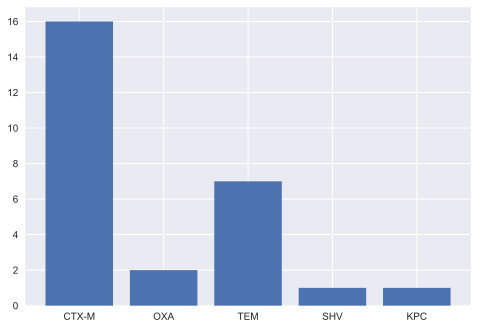

In [6]:
# Observaciones de ESBLs
data = resistencia['Genotipo'].dropna()
genotipos = Counter()
for gen in data:
    genotipos.update(gen.split(';'))
plt.bar(genotipos.keys(), genotipos.values())


<BarContainer object of 12 artists>

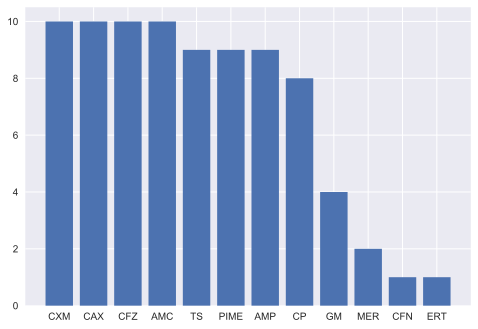

In [7]:
# Observaciones de fenotipo de resistencia
enterobacterias = ['E.coli', 'E.cloacae', 'E. asburiae', 'K.pneumoniae']
enteroDF = resistencia[resistencia['Bacteria'].isin(enterobacterias)]

counter = Counter()
for fenotype in enteroDF['Fenotipo']:
    counter.update(fenotype.split(';'))

sorted_counter = sorted(counter.items(), key=operator.itemgetter(1))[::-1]
sorted_counter = OrderedDict(sorted_counter)
plt.bar(sorted_counter.keys(), sorted_counter.values())



<BarContainer object of 9 artists>

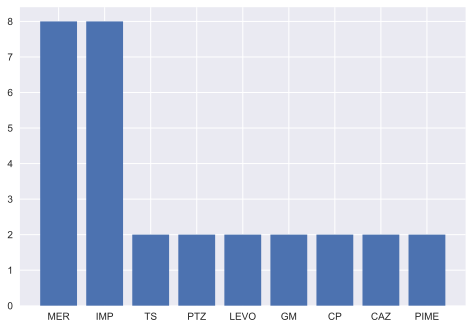

In [8]:
# Observaciones de fenotipo de resistencia
acinetobacter = ['A.baumannii']
enteroDF = resistencia[resistencia['Bacteria'].isin(acinetobacter)]

counter = Counter()
for fenotype in enteroDF['Fenotipo']:
    counter.update(fenotype.split(';'))

sorted_counter = sorted(counter.items(), key=operator.itemgetter(1))[::-1]
sorted_counter = OrderedDict(sorted_counter)
plt.bar(sorted_counter.keys(), sorted_counter.values())


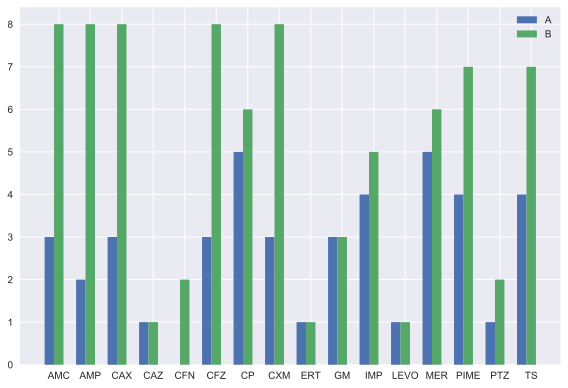

In [9]:
# Número de Observaciones por Sitio Muestreado

Punto_Fenotipo = defaultdict(list)

for index, value in resistencia.iterrows():
    Punto_Fenotipo[value['ID'][0]].extend(value['Fenotipo'].split(';'))


counter_A = Counter(Punto_Fenotipo['A'])
counter_B = Counter(Punto_Fenotipo['B'])

bins = set(counter_B.keys()) | set(counter_A.keys())
ordered_bins = tuple(sorted(bins))

ord_A = []

for current_bin in ordered_bins:
    if counter_A[current_bin]:
        ord_A.append(counter_A[current_bin]) 
    else:
        ord_A.append(0)

ord_B = []

for current_bin in ordered_bins:
    if counter_B[current_bin]:
        ord_B.append(counter_B[current_bin]) 
    else:
        ord_B.append(0)


indexes = np.arange(len(ord_B))
plt.bar(indexes - 0.3, ord_A, label="A", width=0.3)
plt.bar(indexes, ord_B, label="B", width=0.3)
plt.xticks(ticks=indexes, labels=ordered_bins)
plt.tight_layout()
plt.legend()


['CTX-M']
['CTX-M']
['CTX-M']
['CTX-M']
['OXA']
['TEM', 'CTX-M']
['SHV', 'CTX-M']
['TEM', 'CTX-M']
['TEM', 'CTX-M']
['KPC', 'CTX-M']
['CTX-M']
['CTX-M']
['OXA']
['CTX-M']
['CTX-M']
['TEM', 'CTX-M']
['TEM']
['CTX-M']
['TEM', 'CTX-M']
['TEM']


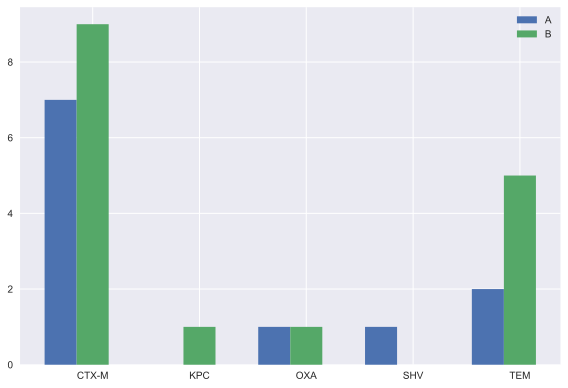

In [10]:
# Número de Observaciones por Sitio Muestreado

Genotipo = defaultdict(list)

for index, value in resistencia.iterrows():
    genes = (value['Genotipo']).split(';')
    print(genes)
    Genotipo[value['ID'][0]].extend(genes)


counter_A = Counter(Genotipo['A'])
counter_B = Counter(Genotipo['B'])

bins = set(counter_B.keys()) | set(counter_A.keys())
ordered_bins = tuple(sorted(bins))

ord_A = []

for current_bin in ordered_bins:
    if counter_A[current_bin]:
        ord_A.append(counter_A[current_bin]) 
    else:
        ord_A.append(0)

ord_B = []

for current_bin in ordered_bins:
    if counter_B[current_bin]:
        ord_B.append(counter_B[current_bin]) 
    else:
        ord_B.append(0)


indexes = np.arange(len(ord_B))
plt.bar(indexes - 0.3, ord_A, label="A", width=0.3)
plt.bar(indexes, ord_B, label="B", width=0.3)
plt.xticks(ticks=indexes, labels=ordered_bins)
plt.tight_layout()
plt.legend()

